## ExperiWatt - Gehirn und Energie
In diesem Arbeitsblatt lernt ihr eigenständig eine vollständige Bearbeitung, Visualisierung und Analyse von euren eigenen EEG Daten durchzuführen. Dafür benötigen wir einige Funktionen des Python Softwarepackages MNE. In dem Dokument **"MNE Funktionen"** findet ihr eine Liste an Funktionen die ihr dafür braucht.


Jede grau hinterlegte Notebook "Box" entält **Kommentare** (gekennzeichnet durch das #-Symbol), die euch Hinweise dazu geben, welche Funktion ihr für die jeweilige Aufgabe verwenden müsst.

In [34]:
# zunächst importieren wir das MNE Package, damit wir es verwenden können
import mne 
from mne import viz
import matplotlib.pyplot as plt
import numpy as np

### EEG Daten laden
Um unsere Daten hier verwenden zu können müssen wir sie in unser Notebook laden. Danach können wir bereits einen ersten Blick auf die Daten werfen! Denke an sinnvolle Variable benennung.

**2 Punkte**

In [137]:
# Name der Datei
fdir = 'Experiment/output_data/'
fname_passive = 'sub-3_ses-sleepy.fif'
fname_active = 'sub-1_ses-power.fif'

# Lade die Datei. In MNE werden EEG Datensätze im "Raw" format gespeichert.
raw_passive = mne.io.read_raw_fif(fdir+fname_passive)
raw_active = mne.io.read_raw_fif(fdir+fname_active)

Opening raw data file Experiment/output_data/sub-3_ses-sleepy.fif...
Isotrak not found
    Range : 0 ... 14872 =      0.000 ...    29.744 secs
Ready.
Opening raw data file Experiment/output_data/sub-1_ses-power.fif...
Isotrak not found
    Range : 0 ... 14872 =      0.000 ...    29.744 secs
Ready.


C:\Users\gross\AppData\Local\Temp\ipykernel_26184\848129828.py:7: RuntimeWarning: This filename (Experiment/output_data/sub-3_ses-sleepy.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_passive = mne.io.read_raw_fif(fdir+fname_passive)
C:\Users\gross\AppData\Local\Temp\ipykernel_26184\848129828.py:8: RuntimeWarning: This filename (Experiment/output_data/sub-1_ses-power.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw_active = mne.io.read_raw_fif(fdir+fname_active)


Das Raw Format ist praktisch, da es viele Informationen über die Daten enthält, so wie die Sampling Rate (gemessene Datenpunkte pro Sekunde) und die Anzahl an Kanälen.

In [138]:
# Sieh dir alle Infos zu dem Datensatz an
raw_active.info

<Info | 9 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F9, F7, F3, Fz, F4, F8, F10, T9, T7, C3, C4, T8, T10, ...
 chs: 24 EEG
 custom_ref_applied: False
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 24
 projs: []
 sfreq: 500.0 Hz
>

Das EEG Signal ist jetzt noch nicht gefiltert und von Artefakten befreit worden, weshalb das Signal chaotisch aussieht.. Das werden wir in dem Abschnitt **Preprocessing** beheben.

### EEG Topography
Das Softwarepackage MNE ermöglicht es uns mit einer standardisierten Map die EEG Aktivität auf die Kanäle die der Position auf dem Kopf entsprechen zu projezieren. Die folgende Abbildung zeigt wie die Montur für das EEG System aussehen sollte.

<div>
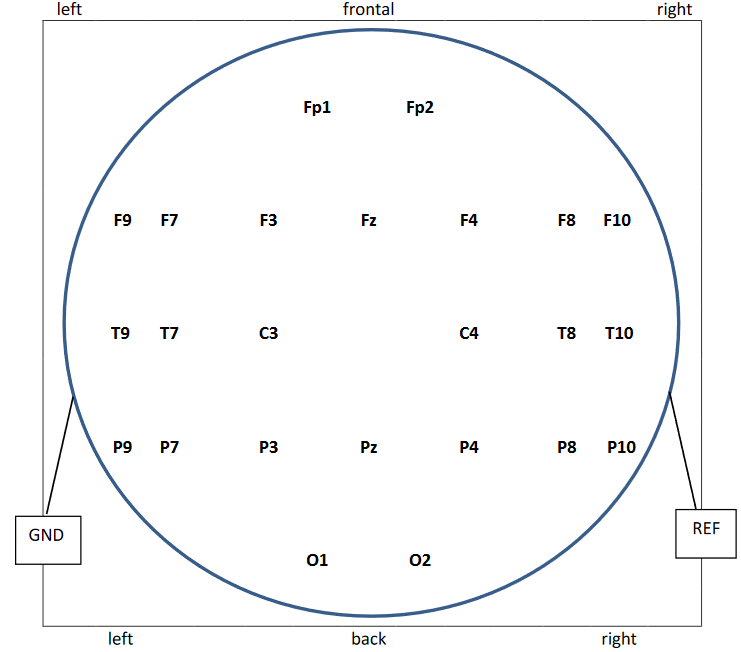
</div>

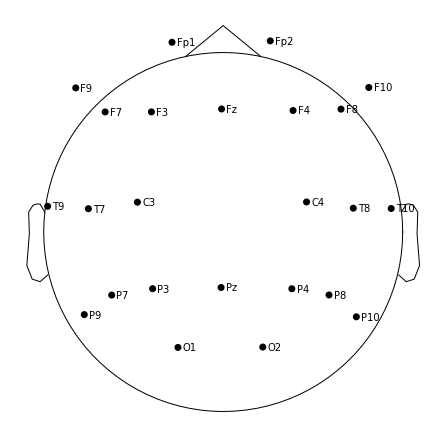

In [159]:
# Standard Map laden und an Datensatz zufügen
montage = mne.channels.make_standard_montage('standard_1020')
raw_active.set_montage(montage)
raw_passive.set_montage(montage)

# Erstelle ein Plot der Standard Montage und vergleiche sie mit der obigen Abbildung. 
fig = raw_active.plot_sensors(show_names=True)

### Daten Betrachtung

Setting up band-stop filter from 40 - 70 Hz

IIR filter parameters
---------------------
Butterworth bandstop zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 40.00, 70.00 Hz: -6.02, -6.02 dB

Opening raw-browser...


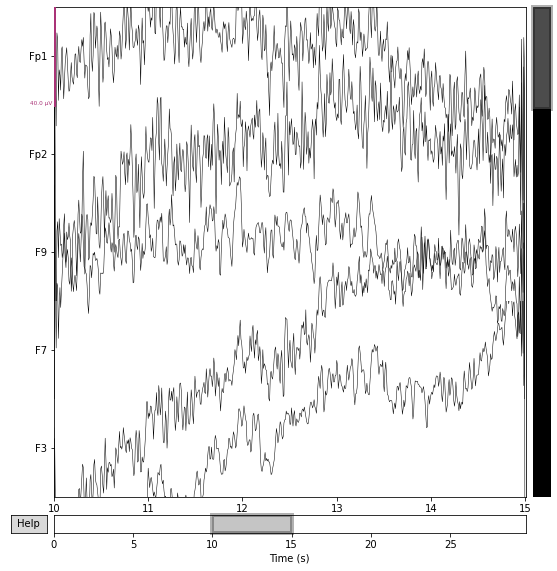

In [191]:
# Erstelle einen Plot der EEG Daten von 5 Kanälen über 5 Sekunden. 
# Starte von Sekunde 10. Verwende außerdem lowpass=40 und highpass=70.
# Verwende dazu die mne function "plot()"
raw_active.plot(duration=5, start=10, n_channels=5, lowpass=40, highpass=70)

# Verwende diese Zeile "plt.show()" nach jeder Grakfik die du erstellst. Ansonsten wird die Grafik immer doppelt gezeigt.
plt.show()

### Power Spectrum
EEG Daten sind aus Signalen von verschiedenen Frequenzen zusammengesetzt. Wenn ihr in der obigen `plot()` Funktion mit den Werten für `lowpass` und `highpass` spielt, seht ihr, dass es einen großen Einfluss auf das Signal hat. "low"- und "highpass" sind Filter, die bestimmte Frequenzen aus dem Signal entfernen. Dies ist sehr praktisch, da nicht alle Frequenzen echte Gehirnaktivität darstellen. Mehr über Filter lernt ihr im nächsten Abschnitt **Preprocessing**

Jede Frequenz trägt unterschiedlich viel zur gesamten Leistung des Signals bei. In diesem Aufgabenteil wollen herausfinden welche Frequenzen in unseren EEG Daten am stärksten vertreten sind. 

In der folgenden Abbildung seht ihr wie ein typisches EEG Spektrum ausseht. Vergleicht euer Spektrum mit diesem (achtet auf die x-Achse) und beschreibt was ihr seht.
<div>
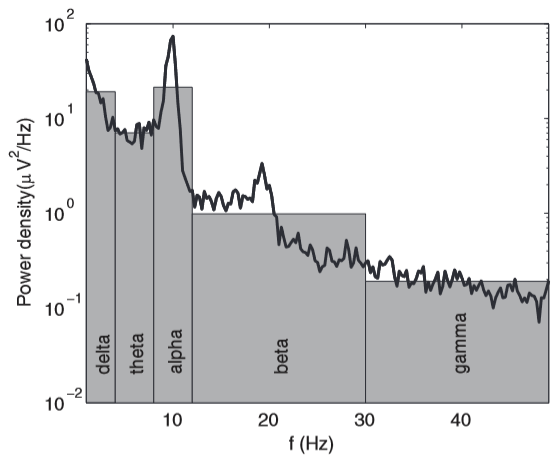
</div>


Effective window size : 4.096 (s)


C:\Users\gross\AppData\Local\Temp\ipykernel_26184\4093801196.py:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw_active.plot_psd(0, 100)


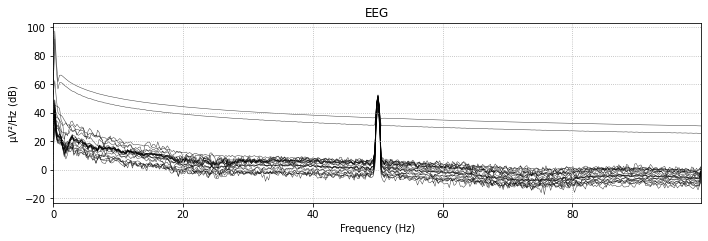

In [151]:
# um einen solchen plot zu erstellen verwende die function "plot_psd()"
# verwende für den Parameter fmax=100  
raw_active.plot_psd(0, 100)
plt.show()

### Preprocessing
Die mit der EEG Kappe gemessene Aktivität ist leider nicht reine Gehirnaktivität. Da die Elektroden in der Kappe sehr sensitiv sind nehmen sie auch jede andere Veränderung von elektrischem Potenzial wahr. 
Ein paar Beispiele für sogenannte Rauschfaktoren sind:
- Augenzwinkern 
- Herzschlag
- Bewegung
- Stromleitungen 

In [ ]:
# filtering 


# DC filtering

# f - Rauschen abziehen

# ICA - reject components


Opening raw-browser...


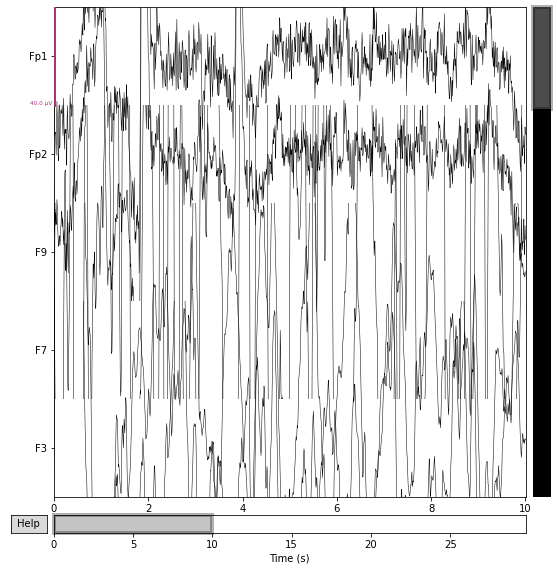

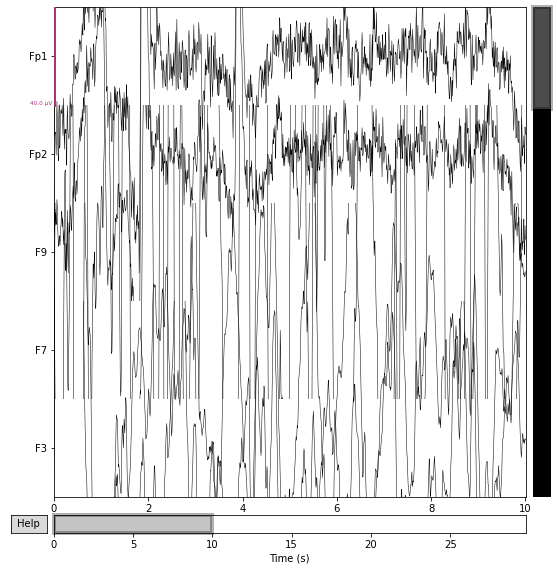

In [112]:
filtered.plot(duration=10, n_channels=5)

Als nächstes wollen wir sehen wie die gemessene Aktivität über die Elektroden (welche verschiedene Bereiche des Gehirns messen) verteilt ist. Dafür müssen wir uns erst einen Zeitpunkt aussuchen den wir betrachten wollen.

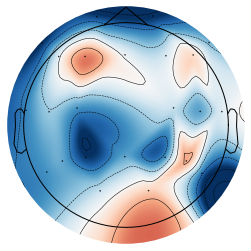

(<matplotlib.image.AxesImage at 0x1ce8ad4e7f0>,
 <matplotlib.contour.QuadContourSet at 0x1ce8ad4ea90>)

In [122]:
zeitpunkt = 3
filtered_x = np.array(filtered.get_data())[:, zeitpunkt*500]
viz.plot_topomap(filtered, raw_active.info)

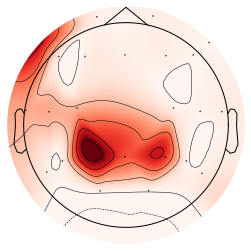

(<matplotlib.image.AxesImage at 0x1ce89ef45e0>,
 <matplotlib.contour.QuadContourSet at 0x1ce89ef4880>)

In [136]:
filtered_int = np.sum(np.array(filtered.get_data())**2, 1)
viz.plot_topomap(filtered_int, raw_active.info, )

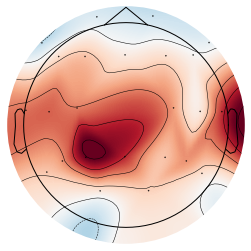

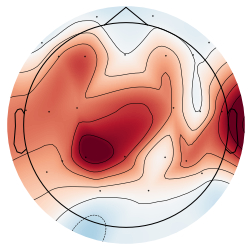

In [79]:
# wähle einen Zeitpunkt (in Sekunden)
zeitpunkt = 3
topography_data_active = np.array(raw_active.get_data())[:, zeitpunkt]
topography_data_passive = np.array(raw_passive.get_data())[:, zeitpunkt]

# Erstelle einen Topographie Plot
viz.plot_topomap(topography_data_active, raw_active.info)
viz.plot_topomap(topography_data_passive, raw_passive.info)
plt.show()

Effective window size : 4.096 (s)


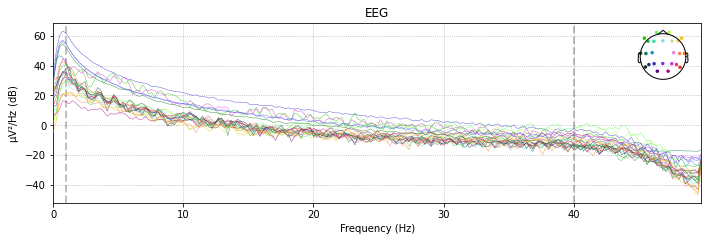

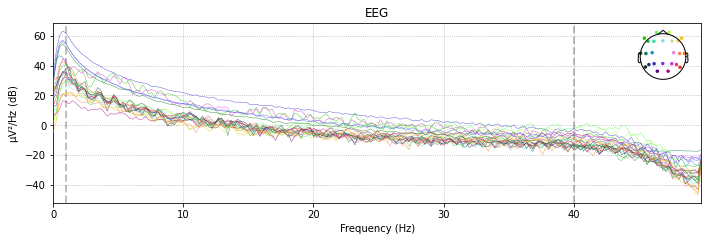

In [114]:
filtered.plot_psd(0,50)

Effective window size : 4.096 (s)


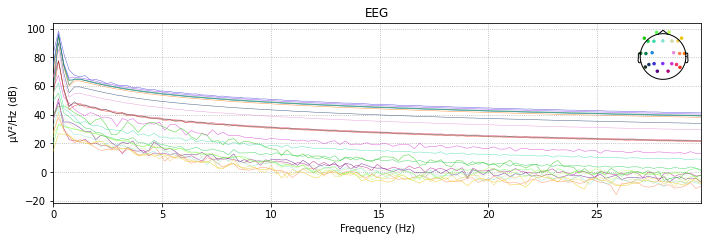

Effective window size : 4.096 (s)


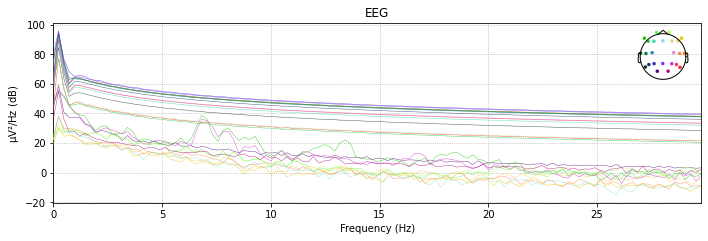

In [81]:
# Begutachte das Frequenzspektrum 
raw_active.plot_psd(0,30)
raw_passive.plot_psd(0,30)
plt.show()

### Energieverbrauch berechnen
Da wir jetzt wissen wie viel power jede Frequenz hat, können wir die gesamte Power von allen Frequenzen berechnen. 